<a href="https://colab.research.google.com/github/norayehia/Machine-learning-kafka-data/blob/main/norakfk1n1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*problem1*
read data cicids_static_data 


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Readdata

In [ ]:
#read data 
df = pd.read_csv('/content/drive/MyDrive/aics/assinm2/cicids_static_data.csv')

In [ ]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53,159,2,2,68,266,34,34,34.000000,0.000000,133,133,133.00,0.000000,2.100629e+06,25157.232700,5.300000e+01,9.006664e+01,157,1,1,1.000,0.000000e+00,1,1,1,1.000000e+00,0.000000e+00,1,1,0,0,0,0,40,40,12578.616350,12578.616350,34,133,73.600000,54.224533,2940.30000,0,0,0,0,0,0,0,0,1,92.000000,34.000000,133.00,40,0,0,0,0,0,0,2,68,2,266,-1,-1,1,20,0.00000,0.0000,0,0,0.000,0.000,0,0,BENIGN
1,53,51673,2,2,90,166,45,45,45.000000,0.000000,83,83,83.00,0.000000,4.954231e+03,77.409866,1.722433e+04,2.982736e+04,51666,3,4,4.000,0.000000e+00,4,4,3,3.000000e+00,0.000000e+00,3,3,0,0,0,0,64,64,38.704933,38.704933,45,83,60.200000,20.813457,433.20000,0,0,0,0,0,0,0,0,1,75.250000,45.000000,83.00,64,0,0,0,0,0,0,2,90,2,166,-1,-1,1,32,0.00000,0.0000,0,0,0.000,0.000,0,0,BENIGN
2,7496,43,1,1,0,6,0,0,0.000000,0.000000,6,6,6.00,0.000000,1.395349e+05,46511.627910,4.300000e+01,0.000000e+00,43,43,0,0.000,0.000000e+00,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,40,20,23255.813950,23255.813950,0,6,2.000000,3.464102,12.00000,0,0,0,1,0,0,0,0,1,3.000000,0.000000,6.00,40,0,0,0,0,0,0,1,0,1,6,29200,0,0,40,0.00000,0.0000,0,0,0.000,0.000,0,0,ATTACK
3,46564,61,1,1,6,6,6,6,6.000000,0.000000,6,6,6.00,0.000000,1.967213e+05,32786.885250,6.100000e+01,0.000000e+00,61,61,0,0.000,0.000000e+00,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,20,20,16393.442620,16393.442620,6,6,6.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.00,20,0,0,0,0,0,0,1,6,1,6,440,307,0,20,0.00000,0.0000,0,0,0.000,0.000,0,0,BENIGN
4,80,69,2,0,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.000000e+00,28985.507250,6.900000e+01,0.000000e+00,69,69,69,69.000,0.000000e+00,69,69,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,40,0,28985.507250,0.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0.00,40,0,0,0,0,0,0,2,0,0,0,251,-1,0,20,0.00000,0.0000,0,0,0.000,0.000,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,50100,197,1,1,6,6,6,6,6.000000,0.000000,6,6,6.00,0.000000,6.091371e+04,10152.284260,1.970000e+02,0.000000e+00,197,197,0,0.000,0.000000e+00,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,20,20,5076.142132,5076.142132,6,6,6.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.00,20,0,0,0,0,0,0,1,6,1,6,62,256,0,20,0.00000,0.0000,0,0,0.000,0.000,0,0,BENIGN
25187,3390,48,1,1,0,6,0,0,0.000000,0.000000,6,6,6.00,0.000000,1.250000e+05,41666.666670,4.800000e+01,0.000000e+00,48,48,0,0.000,0.000000e+00,0,0,0,0.000000e+

#preproceeesing 

REPLACE INFINTE VALUES FROM COLUMN  WITH NAN THEN REPLACE ALL NAN WITH ZERO 

In [ ]:
df.shape

(25191, 79)

In [ ]:
#df = df.reset_index()

REPLACE INFINTE VALUES FROM COLUMN  WITH NAN

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
df.isnull().sum().max()

12

In [ ]:
#replace nan with zero
df = df.fillna(0)

In [ ]:
df.isnull().sum().max()

0

In [ ]:
df.shape

(25191, 79)

Remove any white spaces at the end of the string  to make the feature names like kafka

In [ ]:
df = df.rename(columns={c:c.strip() for c in df.columns})

In [ ]:
pip install category_encoders

A set of scikit-learn-style transformers for encoding categorical variables into numeric with different techniques.
ce.OrdinalEncoder

The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are converted to ordinal integers. This results in a single column of integers (0 to n_categories - 1) per feature



In [ ]:




import category_encoders as ce


# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['Label'])


df = encoder.fit_transform(df)



In [ ]:
#df.info()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


#X = df.drop(['Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Label'],axis=1)
X = df.drop(['Label'],axis=1)
y =df['Label']

In [ ]:
df.shape

(25191, 79)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=.20,random_state=42, stratify= y)
print("shape of X Train :"+str(X_train.shape))
print("shape of X Test :"+str(X_test.shape))
print("shape of Y Train :"+str(Y_train.shape))
print("shape of Y Test :"+str(Y_test.shape))

shape of X Train :(20152, 78)
shape of X Test :(5039, 78)
shape of Y Train :(20152,)
shape of Y Test :(5039,)


#fit rondom forest on the static data
#first algorithm is random forest 
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees,in tunning
when using randomstate with zero THE FP WITH SECOND CLASS INCREASE randomstate with 12 give me better accuracy .99 AND 100  AND FP OF SEND CLASS IS LESS ACORDING TO CONFUSION MATRIX 
F1SCORE IS 1

In [ ]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 


rfc = RandomForestClassifier(random_state=12,n_estimators=100)



# fit the model

rfc.fit(X_train, Y_train)

RandomForestClassifier(random_state=12)

In [ ]:
y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score

# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9974


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[4548    2]
 [  11  478]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


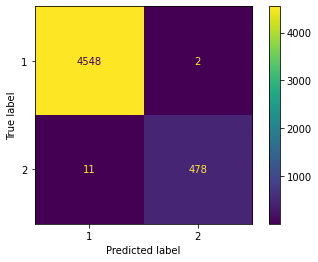

In [ ]:
from sklearn.metrics import plot_confusion_matrix
#the confusion matrix show that fp of fist class is better to predict it
plot_confusion_matrix(rfc, X_test, Y_test)
plt.show()

the model predict well class 1 fp is 2 only

In [ ]:
from sklearn.metrics import classification_report
#the model give better f1score ,recall and precision 
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4550
           2       1.00      0.98      0.99       489

    accuracy                           1.00      5039
   macro avg       1.00      0.99      0.99      5039
weighted avg       1.00      1.00      1.00      5039



In [ ]:
y_pred

array([1, 1, 1, ..., 2, 1, 1])

#second classfier
 MLPClassifier trains iteratively since at each time step the partial derivatives of the loss function with respect to the model parameters are computed to update the parameters. when tunning mlp with randomstate 5,max iteraton 300  give me .94 accracy  and fp is 96 // it give me .90 accuracy when tunng with random state 7 and max iteration 300 so its better with 300 and fp is 118 higher

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=5, max_iter=300).fit(X_train, Y_train)

In [ ]:
y_predm = clf.predict(X_test)

from sklearn.metrics import accuracy_score

# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(Y_test, y_predm)))

Model accuracy score with doors variable removed : 0.9504


In [ ]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_predm)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[4464   86]
 [ 164  325]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


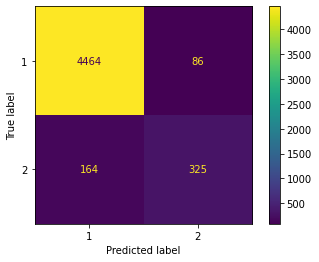

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, Y_test)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_predm))

              precision    recall  f1-score   support

           1       0.96      0.98      0.97      4550
           2       0.79      0.66      0.72       489

    accuracy                           0.95      5039
   macro avg       0.88      0.82      0.85      5039
weighted avg       0.95      0.95      0.95      5039



#kAFkA

on static data show that rondomforest is better on this problem 
acording to f1score and acuracy and confusion matrix the fp for the classes increases 

In [ ]:
# Make sure that you have the dependency installed on your system
# If not installed, install by running the following
!pip install kafka-python

In [ ]:
import time
import ast
from numpy import nan
from math import *
#inf=math.inf

# Import the python Consumer Client for Kafka
from kafka import KafkaConsumer

# instantiate the KafkaConsumer Class using the arguments mentioned.
# do not change any arguments other than the first positional argument.
consumer = KafkaConsumer(
    'task1',   # change this to "task2" for the IOT Botnet Detection  ---- important ----
    bootstrap_servers="34.130.121.39:9092",
    sasl_plain_username="student",
    sasl_plain_password="uottawa",
    security_protocol="SASL_PLAINTEXT",
    sasl_mechanism="PLAIN",
    auto_offset_reset='earliest',
    enable_auto_commit=False
)

i =1 
#make list to append data message on it 
dat=[]
for message in consumer:
    print(f"Consuming the {i+1}th data packet!")
    
    data_packet = message.value
    try:
      #get packets with eval evaluate an expression node or a string containing a Python literal or container display. 
      data_packet=ast.literal_eval(data_packet.decode("utf-8"))
    except ValueError:
      continue
      #append it to dat
    dat.append(data_packet)  
#     print(data_packet)
    
 ##############################################
    
    if i == 100000:
        break
        
    i += 1

 

Streaming output truncated to the last 5000 lines.
Consuming the 95010th data packet!
Consuming the 95011th data packet!
Consuming the 95012th data packet!
Consuming the 95013th data packet!
Consuming the 95014th data packet!
Consuming the 95015th data packet!
Consuming the 95016th data packet!
Consuming the 95017th data packet!
Consuming the 95018th data packet!
Consuming the 95019th data packet!
Consuming the 95020th data packet!
Consuming the 95021th data packet!
Consuming the 95022th data packet!
Consuming the 95023th data packet!
Consuming the 95024th data packet!
Consuming the 95025th data packet!
Consuming the 95026th data packet!
Consuming the 95027th data packet!
Consuming the 95028th data packet!
Consuming the 95029th data packet!
Consuming the 95030th data packet!
Consuming the 95031th data packet!
Consuming the 95032th data packet!
Consuming the 95033th data packet!
Consuming the 95034th data packet!
Consuming the 95035th data packet!
Consuming the 95036th data packet!
Cons

In [ ]:
ts=pd.DataFrame(dat)

In [ ]:
ts.shape

(100000, 79)

replace nan with zero 

In [ ]:
ts = ts.fillna(0)

In [ ]:
ts.isnull().sum().max()

0

use label encodel to convert to numeric like we make on static

In [ ]:
import category_encoders as ce
# encode categorical variables with ordinal encoding

#encoder = ce.OrdinalEncoder(cols=['Label'])


#ts = encoder.fit_transform(ts)
ts = encoder.transform(ts)

ValueError: ignored

In [ ]:

from sklearn.model_selection import train_test_split


#X = df.drop(['Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Label'],axis=1)
Xt = ts.drop(['Label'],axis=1)
yt =ts['Label']

#predict on every 1000 instead of 100000

In [ ]:
import category_encoders as ce
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

1_Try to make to see what the model do with every 1000 of the records 100000
with 1000*i)-1000:(1000*i
 in the first iteration take 0*1000 -1000  then repeate to take the second 1000

 then the model on stake data will predict on it

 2_then make list to append 25000 every iteration drop 1000 from it then  take 1000 record the above to it 
 so100 iteration

In [ ]:
lists=[]
accuracy1=[]
f1score1=[]
for i in range(1,100):
  X22 = ts[(1000*i)-1000:(1000*i)].drop(['Label'],axis=1)
  y22 = ts[(1000*i)-1000:(1000*i)]['Label']
  y_pred33 = rfc.predict(X22)
  encoder = ce.OrdinalEncoder()


  y_pred33 = encoder.fit_transform(y_pred33)
  accuracy1.append(accuracy_score(y22, y_pred33))
  f1score1.append(f1_score(y22, y_pred33, average='weighted'))
  
  
  #take the 1000 record from the data
  df.drop(df.head(1000).index, inplace=True)
  #then replace it with 1000 from kafka
  #in the first iteration take 0*1000 -1000 
  df=df.append(ts[(1000*i)-1000:(1000*i)],ignore_index=True)
  Window=df.copy()
  #print(len(df))
  #lists.append(Window)
  lists.append(df)

In [ ]:
m_dict = {'Accuarcy1': accuracy1, 'f1score1': f1score1}
dfv1 = pd.DataFrame(m_dict)

In [ ]:
dfv1

,Accuarcy1,f1score1
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
94,0.0,0.0
95,0.0,0.0
96,0.0,0.0
97,0.0,0.0


#theaccuracy ranges .99 then move to 1
this show that the randomforest work well with this problem on dynamic also

#plot accuracy score xis be the index 
and and y is the accuracy

Text(0.5, 1.0, 'accuracy graph')

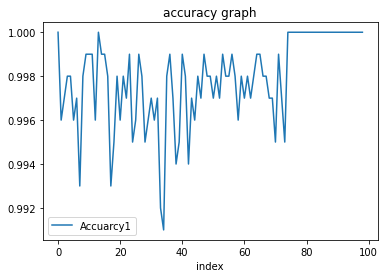

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
ax=plt.gca()
dfv1.reset_index().plot(kind='line',x='index',y='Accuarcy1',ax=ax)
#dfv1.reset_index().plot(kind='line',x='index',y='f1score1',ax=ax)
plt.title("accuracy graph")

Text(0.5, 1.0, 'f1score graph')

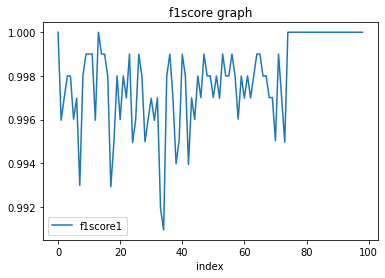

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
ax=plt.gca()
#dfv1.reset_index().plot(kind='line',x='index',y='Accuarcy1',ax=ax)
dfv1.reset_index().plot(kind='line',x='index',y='f1score1',ax=ax)
plt.title("f1score graph")

Text(0.5, 1.0, 'f1score graph')

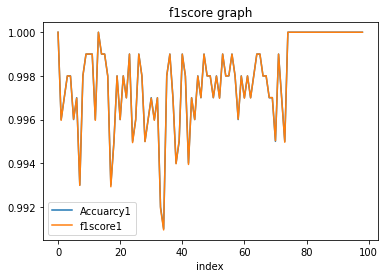

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
ax=plt.gca()
dfv1.reset_index().plot(kind='line',x='index',y='Accuarcy1',ax=ax)
dfv1.reset_index().plot(kind='line',x='index',y='f1score1',ax=ax)
plt.title("f1score graph")

################################################################################

In [ ]:
#from sklearn.metrics import classification_report
 # print(classification_report(y, y_pred33))

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

#predict with windowing on every 1000

#looing accros list we make above make the same operation that we mak on static on every dataframe on the list then fit model on it then fit adaptive modeling on it  then now predict on every 1000 from 100000 in iteration

In [ ]:
from sklearn.metrics import f1_score
accuracy2 = []
f1score2 = []
for i in range(1,len(lists)):

  df2 = pd.DataFrame(lists[i])
  df2.replace([np.inf, -np.inf], np.nan, inplace=True)
  df2 = df2.fillna(0)
  XX = df2.drop(['Label'],axis=1)
  yy = df2['Label']
  #print(XX)
  rfc.fit(XX,yy)
  for j in range(1,100):
      X2 = ts[(1000*j)-1000:(1000*j)].drop(['Label'],axis=1)
      y2 = ts[(1000*j)-1000:(1000*j)]['Label']
      y_pred33 = rfc.predict(X2)
      encoder = ce.OrdinalEncoder()


  y_pred33 = encoder.fit_transform(y_pred33)
  accuracy2.append(accuracy_score(y2, y_pred33))
  f1score2.append(f1_score(y2, y_pred33, average='weighted'))

In [ ]:
m_dict22 = {'Accuarcy2': accuracy2, 'f1_score2': f1score2}

In [ ]:
df22 = pd.DataFrame(m_dict22)

In [ ]:
df22

,Accuarcy2,f1_score2
0,1.000,1.000000
1,1.000,1.000000
2,1.000,1.000000
3,1.000,1.000000
4,1.000,1.000000
...,...,...
93,0.998,0.997991
94,0.998,0.997991
95,0.998,0.997991
96,0.997,0.996981


#show that the accuracy increased ith adaptave models to wardes 1

Text(0.5, 1.0, 'accuracy graph')

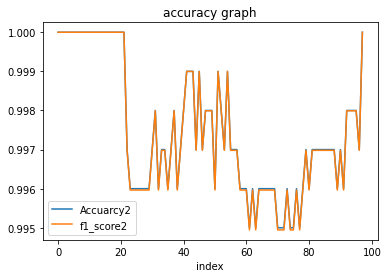

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
ax=plt.gca()
df22.reset_index().plot(kind='line',x='index',y='Accuarcy2',ax=ax)
df22.reset_index().plot(kind='line',x='index',y='f1_score2',ax=ax)
plt.title("accuracy graph")

Text(0.5, 1.0, 'f1scoregraph graph')

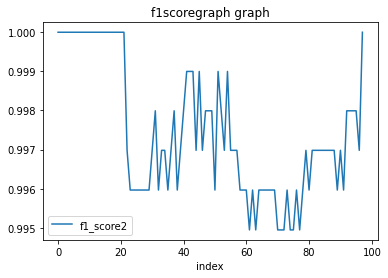

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
ax=plt.gca()
#df.reset_index().plot(kind='line',x='index',y='Accuarcy',ax=ax)
df22.reset_index().plot(kind='line',x='index',y='f1_score2',ax=ax)
plt.title("f1scoregraph graph")

Text(0.5, 1.0, 'all static Vs adaptive graph')

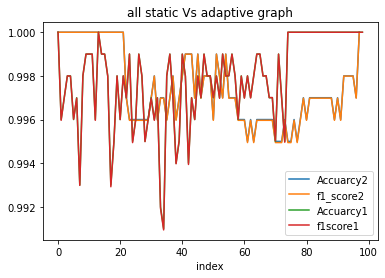

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
ax=plt.gca()
#df.reset_index().plot(kind='line',x='index',y='Accuarcy',ax=ax)
df22.reset_index().plot(kind='line',x='index',y='Accuarcy2',ax=ax)
df22.reset_index().plot(kind='line',x='index',y='f1_score2',ax=ax)
dfv1.reset_index().plot(kind='line',x='index',y='Accuarcy1',ax=ax)
dfv1.reset_index().plot(kind='line',x='index',y='f1score1',ax=ax)
plt.title("all static Vs adaptive graph")

results show that
.RSNDOMFOREST IS BETTER ON THIS PROBLEM  ACCORDING TO ACCURACY AND F1SCORE IT GIVE ME BETTER RESULT on Static data show that RANDOMFOREST is better on this problem according to f1score and accuracy and confusion matrix the fp for the classes decreases,when predict on every 1000 from 100000 in iteration the accuracy ranges from .99 to be 1 now  which is better berformance     
.THE MODEL GIVE BETTER RESULT WHEN REMOVE SORCE COLUMN SO ITS BETTER TO ANALYZE DATA TO KNOW IF IT CONTAIN  COLUMN THAT MAKE RESULT WORSE
